<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/EXAMEN_FINAL_DENIS_ULLOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Imporetando las librerias necesarias
---



In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
#from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# 2. cargar las librerias necesarias

In [ ]:
df = pd.read_csv('clientesmayoristas.csv') 


UnicodeDecodeError: ignored

# la dataset esta mal en la fila 27, por lo cual trabajé con el dataset ingresos

In [ ]:
#cargando la dataset de ingresos
df = pd.read_excel('ingresos_1.xlsx')

In [ ]:
# revisando la dataset
df

,edad,estudio,genero,tipo_trabajo,horas,ingreso
0,27,9,0,0,40,0
1,30,9,0,0,40,0
2,34,8,0,0,40,0
3,26,13,0,0,50,0
4,23,4,1,0,25,0
...,...,...,...,...,...,...
95,32,13,1,0,55,1
96,20,10,0,0,25,0
97,46,3,0,0,40,0
98,37,9,1,0,45,0


In [ ]:
print ("Shape of dataset: ", df.shape)

df.head(5)

Shape of dataset:  (100, 6)


,edad,estudio,genero,tipo_trabajo,horas,ingreso
0,27,9,0,0,40,0
1,30,9,0,0,40,0
2,34,8,0,0,40,0
3,26,13,0,0,50,0
4,23,4,1,0,25,0


# data cleaning

In [ ]:
print ("Shape of dataset before cleaning: ", df.size)
df[[ 'edad', 'estudio', 'genero', 'tipo_trabajo', 'horas',
       'ingreso']] = df[['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas',
       'ingreso']].apply(pd.to_numeric, errors='coerce')
pdf = df.dropna()
pdf = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head()

Shape of dataset before cleaning:  600
Shape of dataset after cleaning:  600


,edad,estudio,genero,tipo_trabajo,horas,ingreso
0,27,9,0,0,40,0
1,30,9,0,0,40,0
2,34,8,0,0,40,0
3,26,13,0,0,50,0
4,23,4,1,0,25,0


# Feature selection

In [ ]:
featureset = df[['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas']]

# Normalización
Ahora podemos normalizar el conjunto de funciones. MinMaxScaler transforma características escalando cada característica a un rango dado. Es por defecto (0, 1). Es decir, este estimador escala y traduce cada característica individualmente de modo que esté entre cero y uno.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.15873016, 0.53333333, 0.        , 0.        , 0.54929577],
       [0.20634921, 0.53333333, 0.        , 0.        , 0.54929577],
       [0.26984127, 0.46666667, 0.        , 0.        , 0.54929577],
       [0.14285714, 0.8       , 0.        , 0.        , 0.69014085],
       [0.0952381 , 0.2       , 1.        , 0.        , 0.33802817]])

# Clustering usando Scipy
En esta parte usamos el paquete de scipy para agrupar el dataset, primero calculamos la matriz de distancia

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


En el clustering aglomerativa en cada iteraación el algoritmo debe actualizar la matriz de distancia para reflejar la distancia del grupo recien formado con los grupos restantes en el forest. Los siguientes métodos son compatibles con scipy para calcular la distancia entre el grupo recien formado y cada uno: simple, completo, promedio, ponderado, centroide.

Usamos completo para nuestro caso

In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


Esencialmente la agrupación jerárquica no requiere un número predeterminado de agrupaciones. Sin embargo en algunas aplicaciones queremos una particion de clusteres disjuntos como en clústeres planos. entonces puede usar una linea de corte

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 6, 6, 6, 5, 5, 6, 5, 2, 5, 7, 5, 7, 7, 3, 3, 2, 4, 5, 5, 2, 3,
       3, 7, 3, 5, 5, 5, 3, 1, 5, 4, 7, 5, 3, 1, 5, 5, 5, 3, 5, 3, 5, 5,
       5, 3, 6, 5, 1, 4, 6, 1, 3, 2, 4, 6, 6, 4, 1, 5, 5, 6, 6, 6, 3, 3,
       6, 5, 5, 6, 5, 5, 3, 3, 3, 3, 6, 5, 2, 1, 1, 1, 5, 5, 4, 1, 6, 5,
       5, 3, 7, 3, 5, 5, 5, 5, 6, 7, 5, 4], dtype=int32)

Además, puede determinar la cantidad de clústeres directamente

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([4, 4, 4, 4, 3, 3, 4, 3, 2, 3, 5, 3, 5, 5, 2, 2, 2, 3, 3, 3, 2, 2,
       2, 5, 2, 3, 3, 3, 2, 1, 3, 3, 5, 3, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 2, 4, 3, 1, 3, 4, 1, 2, 2, 3, 4, 4, 3, 1, 3, 3, 4, 4, 4, 2, 2,
       4, 3, 3, 4, 3, 3, 2, 2, 2, 2, 4, 3, 2, 1, 1, 1, 3, 3, 3, 1, 4, 3,
       3, 2, 5, 2, 3, 3, 3, 3, 4, 5, 3, 3], dtype=int32)

Ahora tracemos el dendrograma:

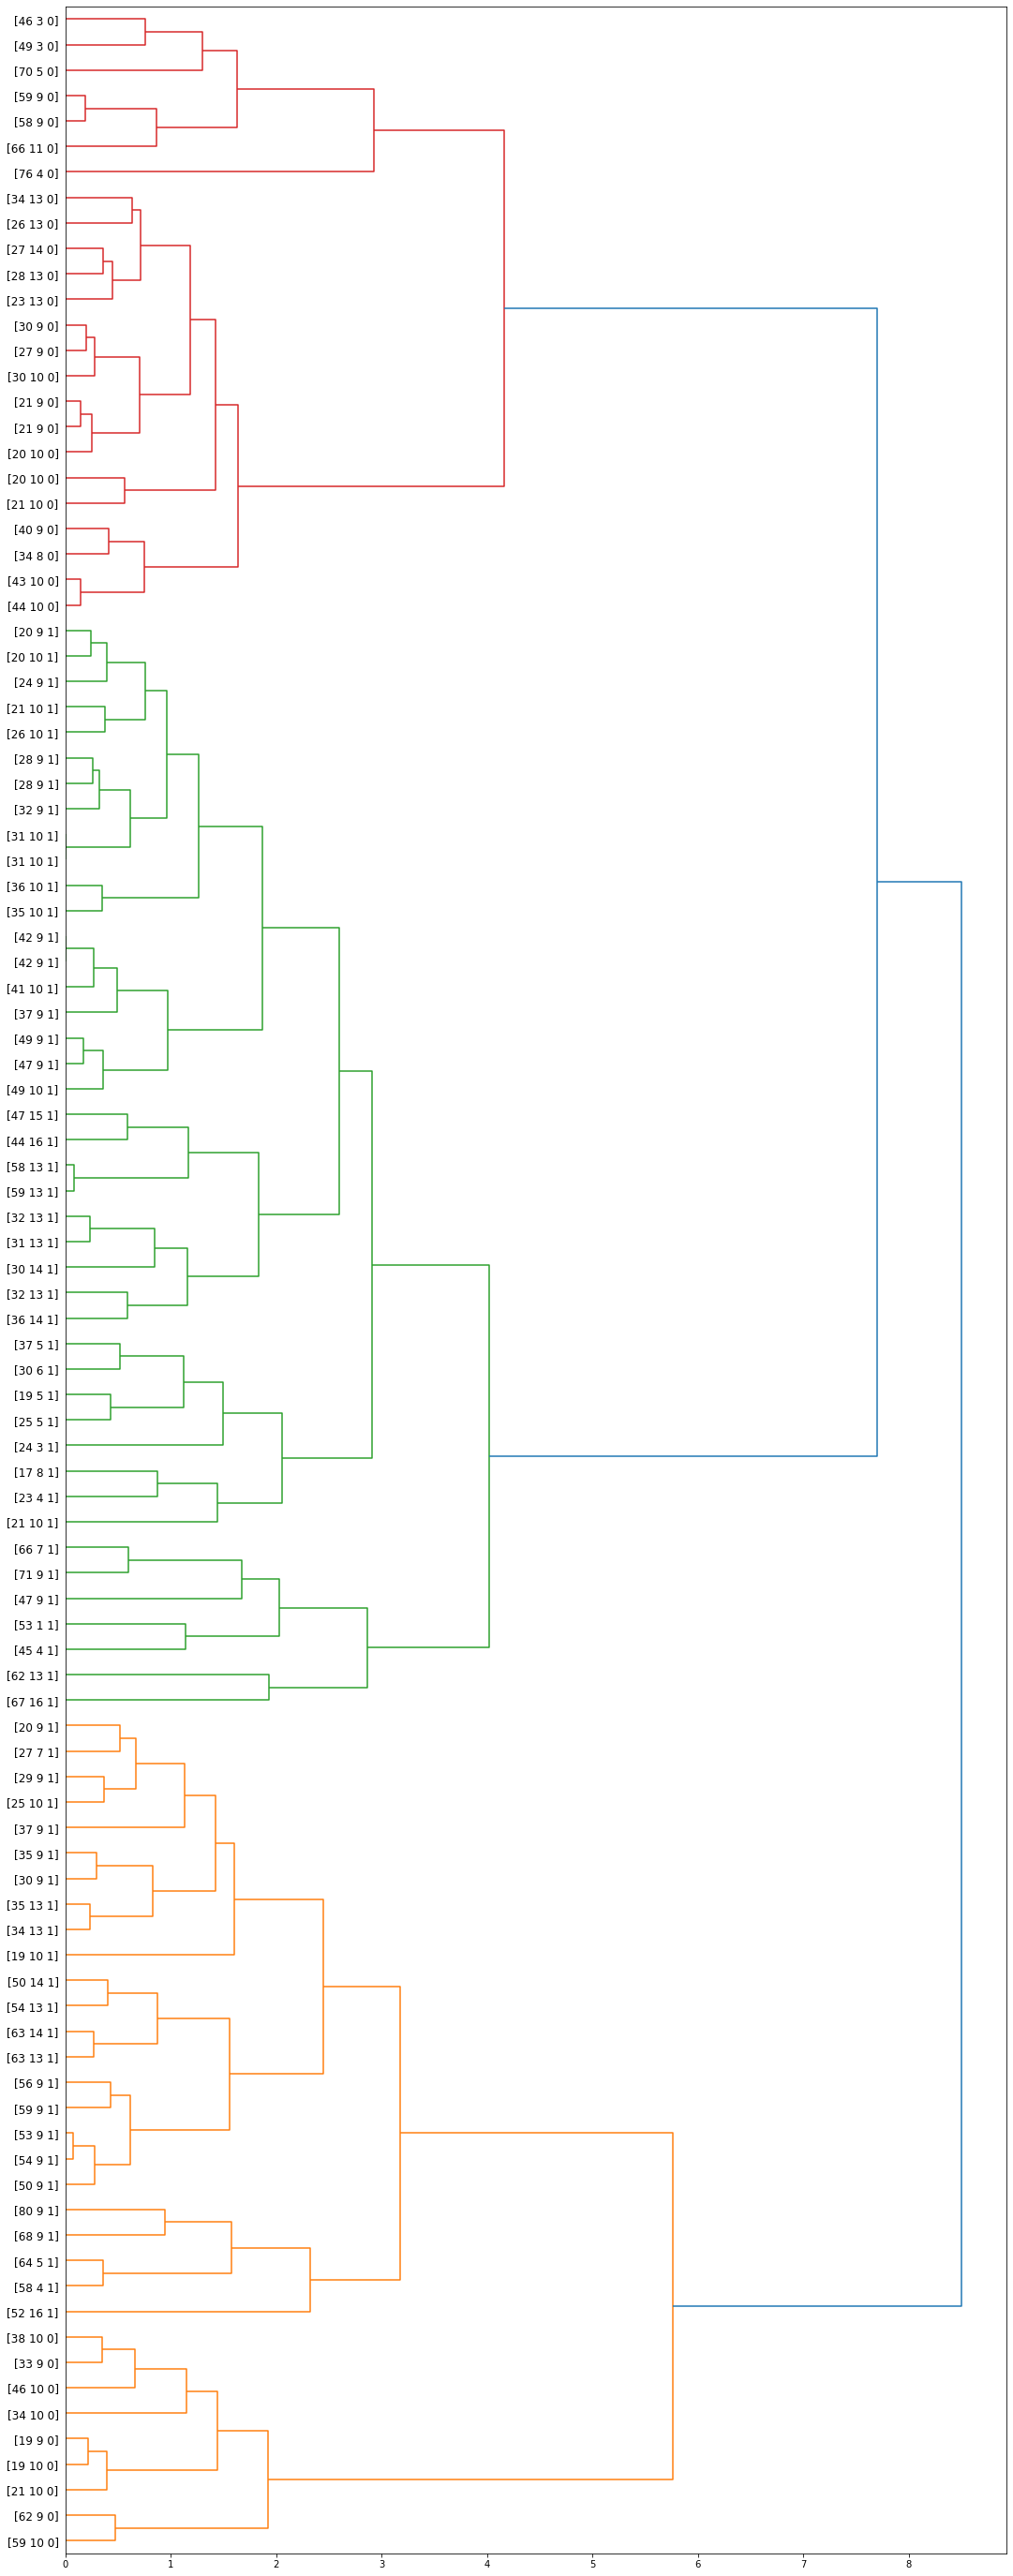

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['edad'][id], df['estudio'][id], int(float(df['genero'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# Clustering usando scikit learn
Vamos a reacerlos de nuevo pero esta vez usando package de scikit learn

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.04761905 0.12957671 ... 0.50095399 1.01496532 1.12085046]
 [0.04761905 0.         0.09206349 ... 0.47381418 1.00861539 1.10830456]
 [0.12957671 0.09206349 0.         ... 0.38391704 1.00581875 1.09660801]
 ...
 [0.50095399 0.47381418 0.38391704 ... 0.         1.08874584 1.14707308]
 [1.01496532 1.00861539 1.00581875 ... 1.08874584 0.         0.49114543]
 [1.12085046 1.10830456 1.09660801 ... 1.14707308 0.49114543 0.        ]]


Ahora, podemos usar la función agglomeratveClustering de la librería de scikit learn para agrupar dataset. AgglomerativeClustering realiza una agrupación jerárquica utilizando un enfoque de abajo hacia arriba. Los criterios de vinculación determinan la metrica utilizada para la estrategia de función. Ward minimiza la suma de diferencias cuadradas dentro de todo los grupos. Es un enfoque que minimiza la varianza y en este sentido es similar a la función objetivo de K-means pero se aborda con un enfoque jerárquico aglomerativo. El linkage máximo o completo minimiza la distancia máxima entre observaciones de pares de grupos. El linkage promedio minimiza el promedio de las distancias entre todas las observaciones de pares grupos

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([5, 5, 5, 5, 1, 2, 5, 2, 0, 2, 4, 2, 4, 4, 0, 0, 0, 2, 1, 2, 0, 0,
       0, 4, 0, 2, 2, 1, 0, 3, 2, 1, 4, 1, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 5, 2, 3, 2, 5, 3, 0, 0, 1, 5, 5, 2, 3, 2, 2, 5, 5, 5, 0, 0,
       5, 2, 2, 5, 2, 1, 0, 0, 0, 0, 5, 1, 0, 3, 3, 3, 2, 2, 2, 3, 5, 2,
       1, 0, 4, 0, 2, 2, 1, 2, 5, 4, 2, 1])


Y podemos agregarun nuevo campo a nuestro dataframe de datos para mostrar el grupo de cada fila

In [ ]:
df['cluster_'] = agglom.labels_
df.head()

,edad,estudio,genero,tipo_trabajo,horas,ingreso,cluster_
0,27,9,0,0,40,0,5
1,30,9,0,0,40,0,5
2,34,8,0,0,40,0,5
3,26,13,0,0,50,0,5
4,23,4,1,0,25,0,1


In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.edad[i], subset.genero[i],str(subset['estudio'][i]), rotation=25) 
    plt.scatter(subset.ingreso, subset.horas, s= subset.tipo_trabajo*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('ingreso')
plt.ylabel('horas')

Text(0, 0.5, 'horas')

In [ ]:
df.groupby(['cluster_','ingreso'])['cluster_'].count()

cluster_  ingreso
0         0          19
          1           5
1         0          10
          1           1
2         0          17
          1          15
3         0           9
4         0           7
5         0          17
Name: cluster_, dtype: int64

Ahora podemos ver las características de cada clúster:

In [ ]:
ingre = df.groupby(['cluster_','ingreso'])['edad',	'estudio',	'genero',	'tipo_trabajo',	'horas'	].mean()
ingre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


edad    estudio  genero  tipo_trabajo      horas
cluster_ ingreso                                                       
0        0        44.157895   9.421053     1.0           1.0  42.842105
         1        55.200000  12.200000     1.0           1.0  46.000000
1        0        30.400000   5.500000     1.0           0.0  32.200000
         1        37.000000   5.000000     1.0           0.0  50.000000
2        0        35.470588   9.941176     1.0           0.0  42.823529
         1        44.733333  12.000000     1.0           0.0  44.466667
3        0        36.777778   9.666667     0.0           1.0  44.666667
4        0        60.571429   6.285714     0.0           0.0  31.000000
5        0        28.764706  10.529412     0.0           0.0  36.764706

Text(0, 0.5, 'horas')

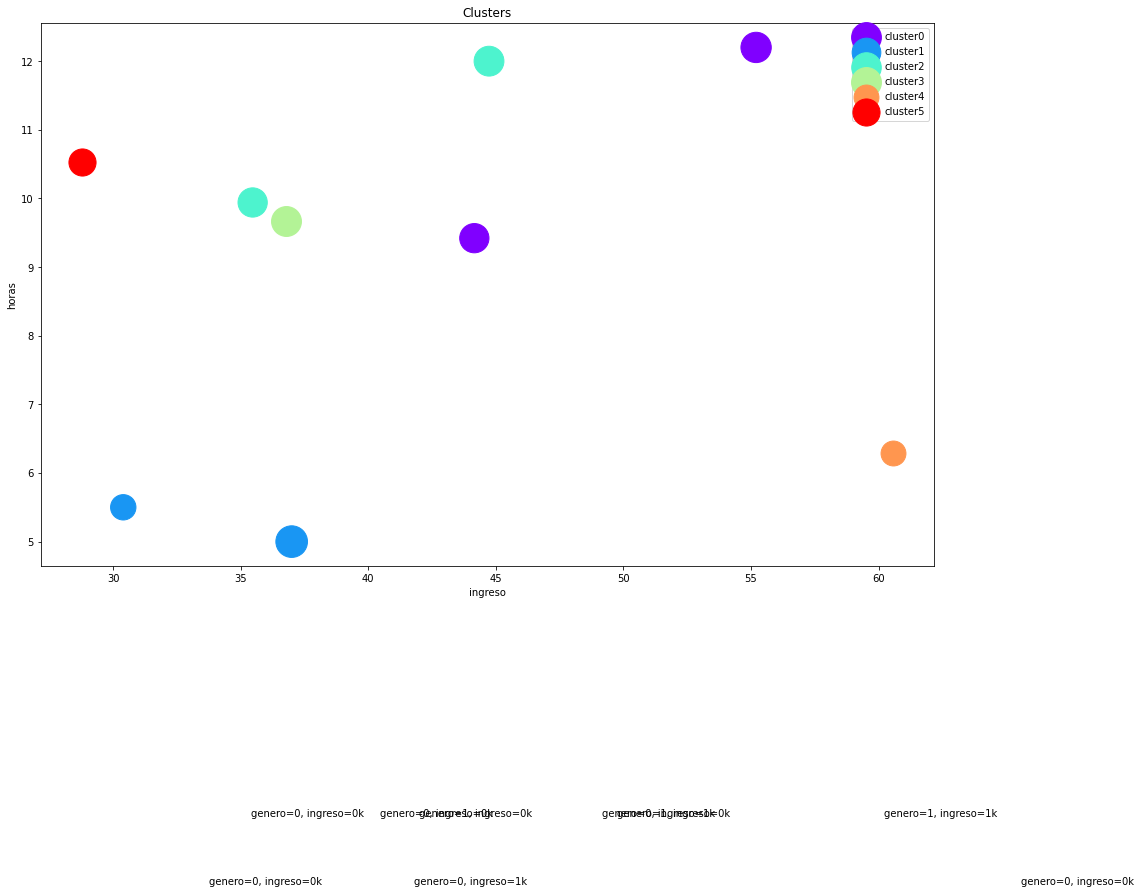

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = ingre.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'genero='+str(int(i)) + ', ingreso='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.edad, subset.estudio, s=subset.horas*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('ingreso')
plt.ylabel('horas')


# MUCHAS GRACIAS 
# DENIS ULLUA DE LA CRUZ 

In [57]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/EXAMEN_FINAL_DENIS_ULLOA.ipynb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-plain-generic is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
[NbConvertApp] Converting notebook /content/EXAMEN_FINAL_DENIS_ULLOA.ipynb to pdf
[NbConvertApp] Support files will be in EXAMEN_FINAL_DENIS_ULLOA_files/
[NbConvertApp] Making directory ./EXAMEN_FINAL_DENIS_ULLOA_files
[NbConvertApp] Making directory ./EXAMEN_FINAL_DENIS_ULLOA_files
[NbConvertApp] Making directory ./EXAMEN_FINAL_DENIS_ULLOA_files
[NbConvertApp] Writing 60514 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebo